In [1]:
!pip3 install requests
!pip3 install bs4
!pip3 install selenium

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=1bec3615fb72f8078e007b9a220e1d283bd84a0e9ba39a2dadce416e1e1cdf0f
  Stored in directory: /Users/wonny/Library/Caches/pip/wheels/73/2b/cb/099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


# 과제 1 Request and Beautiful Soup 

학사정보 가져오기

In [8]:
import requests

url = 'https://www.yonsei.ac.kr/sc/support/calendar.jsp?cYear=2023&hakGi=1'
res = requests.get(url)

In [9]:
print(res) # 응답 객체


<Response [200]>


In [10]:
html = res.text # HTML 텍스트

In [11]:
from bs4 import BeautifulSoup

# 첫 번째 인자: 파싱할 객체
# 두 번째 인자: 사용할 parser(구문 분석기)
soup = BeautifulSoup(html, 'html.parser') 

In [39]:
months =soup.find_all('th')

month_rows = []

for month in months:
    print(str(month).split('rowspan')[1][2], month.get_text())
    month_rows.append(int(str(month).split('rowspan')[1][2]))


6 02 FEB
6 03 MAR
7 04 APR
8 05 MAY
9 06 JUN
1 07 JUL
5 08 AUG


In [40]:
month_rows #2,3,4,5,6,7,8 달의 row수

[6, 6, 7, 8, 9, 1, 5]

In [44]:
month_names= [] 
tmp= [2,3,4,5,6,7,8]
for i, rows in enumerate(month_rows):
    x= tmp[i]
    for j in range(rows):
        month_names.append(x)        

In [45]:
month_names

[2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 8,
 8,
 8,
 8,
 8]

In [46]:
import pandas as pd
df= pd.DataFrame(columns=['Month', 'Day', 'Event'])
df['Month']= month_names

In [47]:
df

,Month,Day,Event
0,2,NaN,NaN
1,2,NaN,NaN
2,2,NaN,NaN
3,2,NaN,NaN
4,2,NaN,NaN
5,2,NaN,NaN
6,3,NaN,NaN
7,3,NaN,NaN
8,3,NaN,NaN
9,3,NaN,NaN


In [48]:
items = soup.findAll('td', {'class': 'des'})
events= []
day = []
for i, item in enumerate(items,start=1):
    if i % 2 == 0:
        #events
        print(item.get_text().strip())
        events.append(item.get_text().strip())
    else: 
        #dates
        print(item.get_text().strip() + '--------------------------------------------------------')
        day.append(item.get_text().strip())

1(수)--------------------------------------------------------
휴 · 복학 접수 시작
13(월)~17(금)--------------------------------------------------------
2023-1학기 수강신청
17(금)~23(목)--------------------------------------------------------
2023-1학기 등록
22(수)--------------------------------------------------------
복학 접수 마감
26(일)--------------------------------------------------------
졸업예배
27(월)--------------------------------------------------------
학위수여식
1(수)--------------------------------------------------------
삼일절
2(목)--------------------------------------------------------
개강 / 교무위원회
6(월)~8(수)--------------------------------------------------------
수강신청 확인 및 변경
10(금)~13(월)--------------------------------------------------------
2023-1학기 추가등록
13(월)~17(금)--------------------------------------------------------
조기졸업 신청
15(수)--------------------------------------------------------
미등록자 일반 휴학 접수 마감 / 등록금 전액반환 마감
6(목)--------------------------------------------------------
교무위원회
7(금)--------------------

In [49]:
df['Day']= day
df['Event']= events
df

,Month,Day,Event
0,2,1(수),휴 · 복학 접수 시작
1,2,13(월)~17(금),2023-1학기 수강신청
2,2,17(금)~23(목),2023-1학기 등록
3,2,22(수),복학 접수 마감
4,2,26(일),졸업예배
5,2,27(월),학위수여식
6,3,1(수),삼일절
7,3,2(목),개강 / 교무위원회
8,3,6(월)~8(수),수강신청 확인 및 변경
9,3,10(금)~13(월),2023-1학기 추가등록


In [50]:
df.to_csv('23-1_학사일정.csv',index=False)

# 과제 2

In [51]:
import selenium
from selenium import webdriver

driver = webdriver.Chrome()

In [52]:
# 해당 URL로 이동
driver.get('https://www.naver.com/') 

# 웹 페이지 요소 로드를 기다림
driver.implicitly_wait(5)

In [53]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
# XPATH를 이용하여 검색창에 해당하는 요소 찾기
search = driver.find_element(By.XPATH, '//*[@id="query"]')
# 검색어 입력
search.send_keys('고려대학교')
# Keys.RETURN = Enter 입력
search.send_keys(Keys.RETURN)


In [60]:
img = driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[1]/div/div[2]/a/img')

img_url =img.get_property('src')

In [62]:
import urllib.request
from PIL import Image
urllib.request.urlretrieve(img_url, "test.jpg")
im = Image.open("test.jpg")

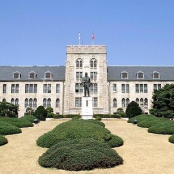

In [64]:
im